In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../data/ai_generated_code_new.csv")


In [4]:
df.head()

,Unnamed: 0,question,difficulty,code,num_lines,num_parameters,num_loops,sample_input,expected_output,actual_output,execution_time_ms,model
0,0,"Write a program that prints ""Hello, World!"" to...",Easy,"print(""Hello, World!"")",1,0.0,0,NaN,"Hello, World!","Hello, World!",0.032084,gpt-4o
1,1,"Ask the user for their name and age, then prin...",Easy,"def greet(name, age):\n return f""Hello {nam...",3,2.0,0,"('Alice', 25)","Hello Alice, you are 25 years old.","Hello Alice, you are 25 years old.",0.056292,gpt-4o
2,2,Write a program that adds two user-input numbe...,Easy,"def add(a, b):\n return a + b\nresult = add...",3,2.0,0,"(3, 4)",7,7,0.029916,gpt-4o
3,3,Take an integer as input and print whether it ...,Easy,"def is_even(n):\n return ""Even"" if n % 2 ==...",3,2.0,0,5,Odd,Odd,0.037417,gpt-4o
4,4,"Given three numbers, print the largest one.",Easy,"def find_largest(a, b, c):\n return max(a, ...",3,3.0,0,"(4, 7, 2)",7,7,0.040083,gpt-4o


### Idea: 
Have a few code examples

Have a histogram for execution time -> filter out by difficulty & model.

In [5]:
import altair as alt

In [7]:
# Convert 'difficulty' and 'model' to categorical types
df['difficulty'] = df['difficulty'].astype('category')
df['model'] = df['model'].astype('category')

# Filter the data to only include 'Easy' and 'Medium' problems
df_filtered = df[df['difficulty'].isin(['Easy', 'Medium'])]

# Bar plot for average execution time (Easy vs. Medium by Model)
chart_time = alt.Chart(df_filtered).mark_bar().encode(
    x='difficulty:N',  # Difficulty levels (Easy, Medium)
    y='mean(execution_time_ms):Q',  # Average execution time
    color='model:N',  # Color by different AI models
    column='model:N',  # Separate the bars by model
    tooltip=['difficulty:N', 'mean(execution_time_ms):Q']  # Show tooltip with execution time
).properties(
    title="Comparison of Execution Time: Easy vs Medium by Model"
)

# Bar plot for average number of lines (Easy vs. Medium by Model)
chart_lines = alt.Chart(df_filtered).mark_bar().encode(
    x='difficulty:N',  # Difficulty levels (Easy, Medium)
    y='mean(num_lines):Q',  # Average number of lines
    color=alt.Color('model:N', scale=alt.Scale(range=['#38a7c4', '#f49284', '#64c489'])),  # Custom color palette
    column='model:N',  # Separate the bars by model
    tooltip=['difficulty:N', 'mean(num_lines):Q']  # Show tooltip with number of lines
).properties(
    title="Comparison of Code Length (Lines): Easy vs Medium by Model"
)

# Display the charts
chart_time | chart_lines  # Using concatenation to show both charts side by side

/Users/sasha/anaconda3/envs/pythoncoding/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/sasha/anaconda3/envs/pythoncoding/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/Users/sasha/anaconda3/envs/pythoncoding/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, c

alt.HConcatChart(...)

In [21]:
chart = chart_time | chart_lines
chart.save("../docs/viz1.html")

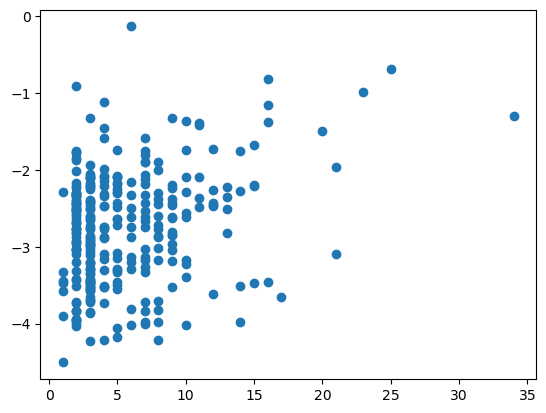

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import math
#filtered_df = df[df["execution_time_ms"] != np.nan]
df["log_execution_time_ms"] = [math.log(tim) for tim in df["execution_time_ms"]]
df["log_num_lines"] = [math.log(tim) for tim in df["num_lines"]]
plt.scatter("num_lines", "log_execution_time_ms", data=df)

In [20]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
radio_button = alt.binding_radio(
    options = [None, "gpt-4o", "o3-mini", "copilot"],
    labels=["All", "GPT-4o", "o3-mini", "Microsoft Copilot"],
    name="Model: ",
)
selection = alt.selection_point(fields=["model"], bind=radio_button)
chart2 = alt.Chart(df).mark_circle().encode(
    x=alt.X("num_lines:Q", title="Number of Lines"),
    y=alt.Y("log_execution_time_ms:Q", title="log(Execution Time (ms))"),
    color=alt.condition(
        selection,
        alt.Color("model:N", scale=alt.Scale(domain=["gpt-4o", "o3-mini", "copilot"], range=['#f49284', '#64c489', '#38a7c4'])),
        alt.value('lightgrey')
    ),
    opacity = alt.condition(
        selection, 
        alt.value(1),
        alt.value(0.5)
    ),
    tooltip=alt.Tooltip(["difficulty:O", "execution_time_ms:Q"])
).add_params(selection).properties(
    title="log(Execution Time) vs Number of Lines"
)
chart2.save("../docs/viz2.html")
chart2

alt.Chart(...)

In [ ]:
df[df["expected_output"] != df["actual_output"]][["expected_output", "actual_output"]]

,expected_output,actual_output
49,olleh,name 'reverse_recursive' is not defined
51,True,name 'string' is not defined
52,3,name 'Counter' is not defined
59,"[1, 2, 3, 4, 5]",name 'flatten' is not defined
61,55,name 'fib' is not defined
...,...,...
287,NaN,NaN
292,NaN,NaN
296,NaN,NaN
298,NaN,NaN


In [ ]:
# Boxplot in D3